<a href="https://colab.research.google.com/github/parulgo7/MLNotebooks/blob/main/PG7WFM_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Comparison of Regression Models on Predicting Medical Costs

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
![Medical Cost](https://creditkarma-cms.imgix.net/wp-content/uploads/2018/04/boomers-gen-x-high-cost-medical-care.jpg)
In this assignment, you will implement some learning models in the context of a **regression** problem in the [Medical Cost Personal Dataset on Kaggle](https://www.kaggle.com/mirichoi0218/insurance). Specifically, you will attempt to predict the medical cost billed by health insurance using other provided patient's data. For references, you may refer to [my slides](https://docs.google.com/presentation/d/10D1he89peAWaFgjtZlHpUzvOOAie_vIFT95htKCKgc0/edit#slide=id.p) or the Google Colab if you need additional sample codes to help with your assignment. To get started, you will need to upload/copy the dataset (.csv) into the same folder as this file.

For deliverables, you must write code in Colab and submit the downloaded Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.


***
##  Task 1: SEE THE BIG PICTURE
Write a paragraph explaining the context of the problem in which you are trying to investigate. We will assume that the data file is put into the same workspace on Colab. Then, you can write some code to load the CSV file and take a quick look at the dataset, and output the following:

 * How big is your dataset? (in terms of MB)
 * How many entries does it have?
 * How many features does it have?
 * Does it contain any categorical data?
 * Is there any missing value?
 * What are some basic statistics you can learn right away about this dataset?

In [ ]:
# Import some common packages
import os
import numpy as np
# import matplotlib
# import matplotlib.pyplot as plt
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "assignment_1"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  """Save the selected figure into disc under an image extention and resolution

  Parameters
  ----------
  fig_id : figure handle
    The id number of the figure
  tight_layout : boolean (True or False)
    Specifies whenther the layout should be tight or not
  fig_extension: string
    Under what extension should the file be saved ("png" or "jpg")
  resolution: int
    the quality of the figure (ie. 100,200,300)

  Returns
  -------
  void
    Does not return any value
  """

  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("Saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)




In [ ]:
import pandas as pd

def loadMedicalData():

  mdata = pd.read_csv("/content/sample_data/insurance.csv")
  return mdata

mdata = loadMedicalData()

mdata.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
mdata.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


How big is your dataset? (in terms of MB)
How many entries does it have?
How many features does it have?
Does it contain any categorical data?
Is there any missing value?
What are some basic statistics you can learn right away about this dataset?

The figures above provide answers to the questions listed in this section. The dataset is 0.0733 MB. There are 1338 entries with 7 features. There are some categorical data denoted by the "object" type. There are no missing values.

Some basic statistics about the dataset are Age has a range of 18 to 64 years old. BMI has a mean of 30.663397 (kg/m^2). More statistics can be seen above.

---
##  Task 2: DATA DISCOVERY, CLEANING, AND SCALING

**Data Discover:** Plot out all correlations among the features. You should notice some features are more correlated with your predicted value than other. This information will help you confirm that weights of your regression model later on.

**Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the Imputer class. If your dataset has categorical features, make sure you conver those features into numerical using OneHotEncoder class.

**Feature Scaling** More importantly, your task is to write some codes to normalize the value of each features as follow:

* Subtract the mean value of each feature from the dataset
* Scale (divide) the feature values by their respective standard deviation

**Implementation Note:** You will need to integrate the above operations into a Pipeline to process and transform the training data, then use the same pipeline to transform any validation and testing data.

In [ ]:
# You might want to use the following package
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
# from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


First, let's visualize and understand our data.

In [ ]:
# Let's plot out correlations here!!!

# Split the data into train set (80%) and test set (20%)
train_set, test_set = train_test_split(mdata, test_size=0.2, random_state=42)


In [ ]:
print( train_set.shape )

(1070, 7)


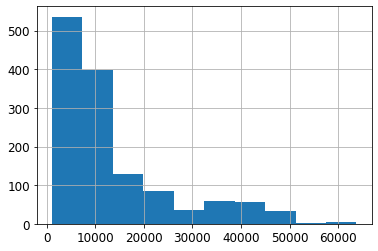

In [ ]:
mdata['charges'].hist()

I notice that there is a really heavy left tail in the data. This is an interesting thing to note. We will make sure to scale our data so outliers don't affect it too greatly.

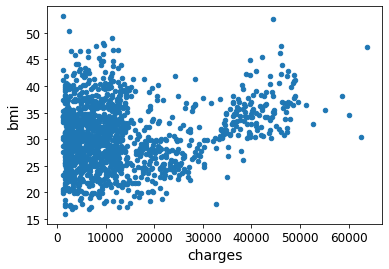

In [ ]:
mdata.plot(kind="scatter", x='charges', y='bmi')

Looks like there is some kind of correlation between bmi and charges, though it is not very strong.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2281bbbd0>,
      dtype=object)

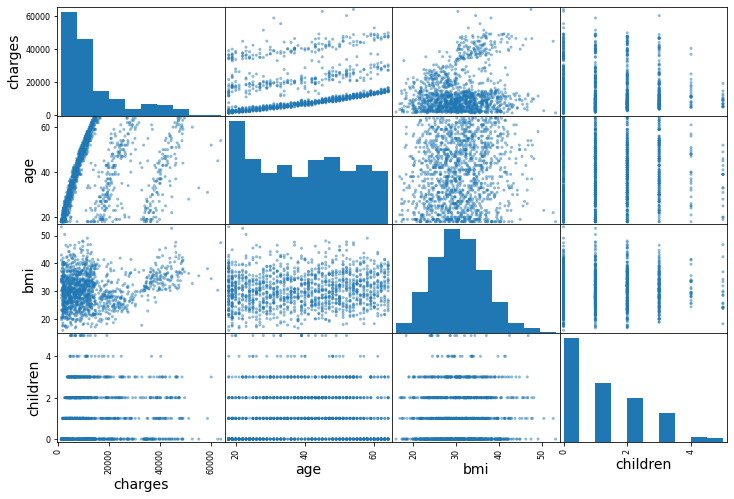

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["charges", "age", "bmi",
              "children"]
scatter_matrix(mdata[attributes], figsize=(12, 8))
# save_fig("scatter_matrix_plot")

In [ ]:
corr_matrix = mdata.corr()
corr_matrix.shape
corr_matrix["charges"].sort_values(ascending=False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

Looks like age and charges are positively correlated. Note how the categorical variables like smoker and region are not in the correlation matrix because they're categorical!

Before we continue, let's get some basics about our dataset like a list of the numerical attributes and the categorical attributes...

In [ ]:
mdata_numerical = mdata.select_dtypes(include=[np.number])
num_attribs = list(mdata_numerical)

mdata_cat = mdata.select_dtypes(include='object')

# This will be helpful when we do our scaling....
cat_attribs = []
for col in mdata_cat.columns:
  cat_attribs.append(col)

Now let's do our splits (train, test, validation).

In [ ]:
X=train_set[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y=train_set[['charges']]

X.head()
y.head()

X_train, X_val, y_train, y_val = train_test_split(
  X,y , random_state=104,test_size=0.20)



In [ ]:
# We also need to clean up our test_set into the desired format so let's do that!!!

y_test = test_set[['charges']]
X_test = test_set[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]

In [ ]:
y_test.head()

,charges
764,9095.06825
887,5272.17580
890,29330.98315
1293,9301.89355
259,33750.29180


In [ ]:
X_test.head()

# Just to confirm I did it correctly

,age,sex,bmi,children,smoker,region
764,45,female,25.175,2,no,northeast
887,36,female,30.020,0,no,northwest
890,64,female,26.885,0,yes,northwest
1293,46,male,25.745,3,no,northwest
259,19,male,31.920,0,yes,northwest


In [ ]:
X_train.head()
y_train.head()

,charges
389,4618.07990
366,13430.26500
336,12142.57860
944,12982.87470
1193,8671.19125


No data cleaning needs to be done at all because there are no null values in this dataset. But we do have categorical variables so we'll do OneHotEncoding.

Feature scaling: More importantly, your task is to write some codes to normalize the value of each features as follow:

Subtract the mean value of each feature from the dataset
Scale (divide) the feature values by their respective standard deviation.

Since StandardScaler is imported (and the TA confirmed we can use it) we will be using that to center scale our data!



In [ ]:
num_attribs.remove('charges') #must remove the labels from our list of num attribs since it was included before

In [ ]:
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

X_prepared = full_pipeline.fit_transform(X_train)
X_prepared_validation = full_pipeline.fit_transform(X_val)

X_prepared_test = full_pipeline.transform(X_test) # don't call fit on this!!!


In [ ]:

print(X_prepared.shape)
print(y_train.shape)

(856, 11)
(856, 1)


In [ ]:
X_prepared

array([[-1.09184876, -0.02813148,  1.52883404, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.17338803,  0.31999291,  1.52883404, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.45654263, -0.77268459, -0.90064976, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.73969722,  1.09619369,  0.71900611, ...,  0.        ,
         1.        ,  0.        ],
       [-0.10080767, -0.42372737,  0.71900611, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.81944478,  1.55258643, -0.09082182, ...,  0.        ,
         0.        ,  1.        ]])

- - -
## Task 3. IMPLEMENT GRADIENT DESCENT
The gradient descent formulation remain the same as one in the lecture. Keep in mind that you will need to add a column $\textbf{x}_0$ with all 1s as part of the training data. You should write code to implement the **MyLinearRegression** class and its predefined methods.

**Gradient Descent:** Notes that you may NOT call the library linear regression which defeats the purpose of this assignment. Make sure your code is well-vectorized.

In [ ]:
# NOTE: You may not use the library Linear Regression, but implement your own!
# REMEMBER to place self.attribute = [] with value from your implementation

class MyLinearRegression:
  """
  Define what a linear regressor can do
  """

  def __init__ (self):
    """
    Initialize the regressor
    """
    self.theta = []; # parameter vector;
    self.alpha = []; # learning rate
    self.cost  = []; # cost function

  def gradientDescent(self, X_train, y_train, theta, alpha, iters):
    """
    Implementatation of the gradient descent
    INPUT:
    alpha: the learning rate
    iters: number of iterations

    OUTPUT:
    theta: updated value for theta
    cost: value of the cost function
    """

    ones = np.ones((856,1))
    # X_train = np.concatenate([ones, X_train], axis=1)

    X_train = np.c_[ones, X_train]

    rows, cols = np.shape(X_train)

    m=rows

    iterations = []
    grad = []

    for iteration in range (iters):
      gradients = 2/m * X_train.T.dot(X_train.dot(theta) - y_train.values) #from lecture
      # print(theta.shape)
      iterations.append(iteration)
      grad.append(np.linalg.norm(gradients))
      theta = np.subtract(theta, alpha*gradients)


    self.theta = theta
    self.cost = grad
    self.alpha = alpha
    return theta, grad, iterations


  def fitUsingGradientDescent(self, X_train, y_train, alpha):
    """
    Train the regressor using gradient descent
    """

    theta = np.random.randn(12,1)
    theta, grad, iters = self.gradientDescent(X_train, y_train, theta, alpha, 200)

    return theta, grad, iters

  def fitUsingNormalEquation(self, X_train, y_train):
    """
    Training using the Normal (close form) equation
    """
    # implementation code here for Task 4.

    rows, cols = np.shape(X_train)

    ones = np.ones((rows,1))

    arr = np.concatenate([ones, X_train], axis=1) # there might be an issue with this part
    theta_best = np.linalg.pinv(arr.T.dot(arr)).dot(arr.T).dot(y_train)

    self.theta = theta_best
    return theta_best

  def predict(self, X_test):
    """
    Predicting the label
    """

    row, col = np.shape(X_test)
    ones = np.ones((row, 1))
    arr = np.concatenate([ones, X_test], axis=1)

    y_predict = arr.dot(self.theta)

    return y_predict

  def __str__(self):
    """
    Print out the parameter out when call print()
    """
    return (f"Parameter vector is {self.theta}")

# Your code goes here to call the instance of class MyLinearRegression
myGradientDescentModel = MyLinearRegression()
# myGradientDescentModel.fitUsingGradientDescent(X_train, y_train, 0.3)

* **Learning Rate:** You will try out different learning rates for the dataset and find a learning rate that converges quickly. If you pick a learning rate, your plot of Cost Function $J(\theta)$ against number of iteration will quickly decay to a small value. This also indicates that your implementation is correct. If your learning rate is too large, the cost function $J(\theta)$ can diverge and blow up. From the below plot, you must be able to report the best learning rate the you found to earn credit for this section.

In [ ]:
# Use the following code to plot out your learning rate
# iters and cost must be supplied to plot out the cost function
# You must plot multiple curves corresponding to different learning rates to justify the best one.
#
# plt.xlabel('Iterations')
# plt.ylabel('Cost')
# plt.title('Error vs. Training Iterations')
# plt.plot(iters, grad, color='red')
# plt.show()

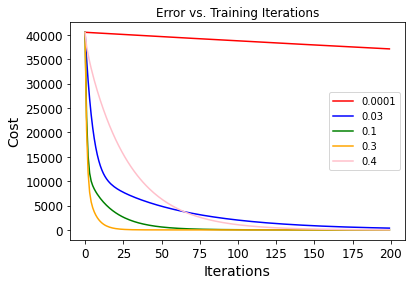

In [ ]:
# Trying out different learning rates here!

t_0001, g_0001, i_0001 =  myGradientDescentModel.fitUsingGradientDescent(X_prepared, y_train, 0.0001) #0.003

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Error vs. Training Iterations')
plt.plot(i_0001, g_0001, color='red', label = "0.0001")

t_03, g_03, i_03 =  myGradientDescentModel.fitUsingGradientDescent(X_prepared, y_train, 0.03)
plt.plot(i_03, g_03, color='blue', label = "0.03")

t_1, g_1, i_1 =  myGradientDescentModel.fitUsingGradientDescent(X_prepared, y_train, 0.1)
plt.plot(i_1, g_1, color='green', label = "0.1")

t_3, g_3, i_3 =  myGradientDescentModel.fitUsingGradientDescent(X_prepared, y_train, 0.3)
plt.plot(i_3, g_3, color='orange', label = "0.3")

t_4, g_4, i_4 =  myGradientDescentModel.fitUsingGradientDescent(X_prepared, y_train, 0.4)
plt.plot(i_4, g_4, color='pink', label = "0.4")

plt.legend()
plt.show()

It looks like the best alpha was 0.3 (because it converges the most)! The associated theta values for that is as follows:

In [ ]:
t_3

array([[ 9000.82603726],
       [ 3704.72307645],
       [ 1912.75322562],
       [  517.85164846],
       [ 4363.56931591],
       [ 4637.95769262],
       [-7289.73413483],
       [16289.93455652],
       [ 2571.36912547],
       [ 2405.13788588],
       [ 2415.4719066 ],
       [ 1607.03637298]])

- - -
## Task 4. IMPLEMENT THE NORMAL EQUATION

In my lecture, you learn that the closed form solution of linear regression using the normal equation formulation. Using the formula does not require any feature scaling, and should be straight forward to implement:

$
    \mathbf{\theta} = ({\mathbf{X}^{T}\mathbf{X}})^{-1}\mathbf{X}^{T}\mathbf{y}.
$

Note that you still need to add a column of 1's to the $\mathbf{
X}$ matrix to have an intercept term.

In [ ]:
# Implement the normalEquation method of the MyLinearRegression Class before execute the code below:
myNormalEquationModel = MyLinearRegression()
theta_n = myNormalEquationModel.fitUsingNormalEquation(X_prepared, y_train)


Let's see what our theta is associated with the normal equation!!!

In [ ]:
print(theta_n)

[[ 9000.64158893]
 [ 3704.72307645]
 [ 1912.75322562]
 [  517.85164846]
 [ 4363.12660611]
 [ 4637.51498282]
 [-7289.51355121]
 [16290.15514014]
 [ 2571.77569997]
 [ 2405.54446038]
 [ 2415.8784811 ]
 [ 1607.44294748]]


- - -
## Task 5. COMPARE DIFFERENT IMPLEMENTATIONS

You should be able to evaluate and compare your gradient descent as well as normal equation implementation of linear regression. In theory, they should be the same, or at least similar. For good measures, you must use the built-in library **Scholastic Gradient Descent (SGD)** as a third model for comparison. For each model, you must compute the RMSE on the **test set** as performance measure. The good news is that you can call library functions to compute these as shown below instead of writing your own code:

* Which one yields the best performance measure for your dataset?
* What is your assessment of the error? Good? Okay? Terrible?

In [ ]:
from sklearn.metrics import mean_squared_error

# Use the built-in SGD Regressor model
from sklearn.linear_model import SGDRegressor

# my code

mySGDModel = SGDRegressor()
mySGDModel.fit(X_prepared, y_train)
y_predict = mySGDModel.predict(X_prepared_test)
mse = mean_squared_error(y_test, y_predict)
mySGDModel_rmse = np.sqrt(mse)
print(mySGDModel_rmse)

# myGradientDescentModel_rmse

myGradientDescentModel.fitUsingGradientDescent(X_prepared, y_train, 0.3)
y_predict_grad = myGradientDescentModel.predict(X_prepared_test)
mse_grad = mean_squared_error(y_test, y_predict_grad)
myGradientDescentModel_rmse = np.sqrt(mse_grad)
print(myGradientDescentModel_rmse)

# myNormalEquationModel_rmse

myNormalEquationModel.fitUsingNormalEquation(X_prepared, y_train)
y_predict_norm = myNormalEquationModel.predict(X_prepared_test)
mse_norm = mean_squared_error(y_test, y_predict_norm)
myNormalEquationModel_rmse = np.sqrt(mse_norm)
print(myNormalEquationModel_rmse)



5825.9047539003805
5822.418222890819
5822.418222890611


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Which one yields the best performance measure for your dataset?
What is your assessment of the error? Good? Okay? Terrible?

The gradient descent equation and the normal equation have about the best performance for the data set. The assessment of the error was good as it was close to the SGDRegressor(). Note that since a random theta matrix was used initially and passed into each respective fit function, the output below and the output above may vary slightly.



*   SGDRegressor() : 5823.976412206093
*   GradientDescentModel(): 5822.4182228908185
*   NormalEquationModel(): 5822.418222890611





- - -
## Task 6. PRESENT YOUR SOLUTION

Now that you need to write a short memo of one paragraph to be read by a non-technical audience (ie. your manager/boss). Focus on answering the following:

* How can you pitch your solution to this project?
* What did you learn so far about the problem?
* Is there any insight moving forward to improve the solution.

  Predicting what medical charges are is difficult, especially with the various factors that are taken into account in medical diagnosises and treatments. The chosen machine learning model can be utilized to indicate predictions for "charges" for patients based off of certain features like age and bmi. Users of this model can self identify or indicate which features they have that are present in this model and gain an idea on what to expect as far as medical charges go. Hospitals can also use this model to gain an idea on what the medical charges will be like for certain patients, and perhaps apply for funding from the government to subsidize certain patient groups' medical charges (such as patients past a certain age). Many other insights can also be made such as which features are less correlated with "charges". Moving forward, better predictions can be arrived at with a better model. This can mean exploring other models such as Neural Networks, and additionally more efforts in cleaning the data before applying the implemented Linear Regression model.  


  Additionally, as far as this academic exercise goes, Linear Regression is a great machine learning algorithm for supervised learning problems and for forecasting variables of interest. Supervised learning consists of knowing what the correct "answer" or label is for the dataset, and being able to train your dataset with this knowledge of the labels. If you don't want to use standardized libraries for linear regression, you can easily implement it (as we learned in this assignment).

- - -
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my [slides](https://docs.google.com/presentation/d/10D1he89peAWaFgjtZlHpUzvOOAie_vIFT95htKCKgc0/edit?usp=sharing) and/or the textbook
 * Talk to the TA, they are available and there to help you during [office hour](http://bit.ly/cs4774oh)
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Assignment 1:...".

Best of luck and have fun!